In [1]:
import allesfitter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
from astropy.timeseries import LombScargle

import scipy
from scipy.fft import fftfreq
from scipy.fft import fft

import allesfitter

import lightkurve as lk
import os

In [2]:
#pip install -U allesfitter

# 1) Downloading lightcurve

SearchResult containing 10 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 11 2019      SPOC     120   388857263      0.0
  1 TESS Sector 11 2019 TESS-SPOC    1800   388857263      0.0
  2 TESS Sector 11 2019       QLP    1800   388857263      0.0
  3 TESS Sector 12 2019      SPOC     120   388857263      0.0
  4 TESS Sector 12 2019 TESS-SPOC    1800   388857263      0.0
  5 TESS Sector 12 2019       QLP    1800   388857263      0.0
  6 TESS Sector 38 2021      SPOC      20   388857263      0.0
  7 TESS Sector 38 2021      SPOC     120   388857263      0.0
  8 TESS Sector 38 2021 TESS-SPOC     600   388857263      0.0
  9 TESS Sector 38 2021       QLP     600   388857263      0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

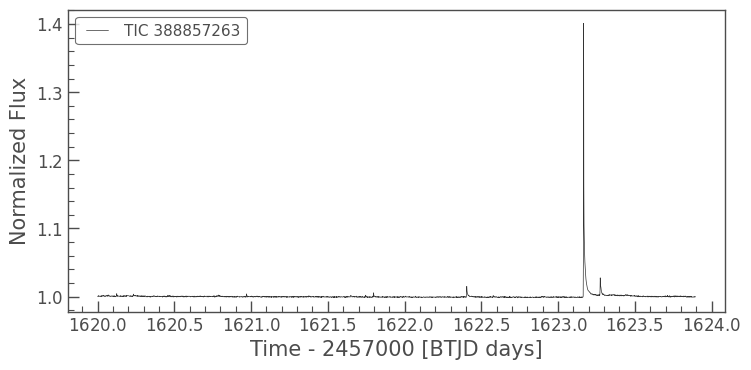

In [9]:
#search flare
search_result = lk.search_lightcurve('TIC 388857263')#, exptime = 120)
print(search_result)

#plot flare
lc = search_result[0].download()
lc = lc.normalize()
#lc = search_result.download_all()
#lc = lc.stitch()
lc = lc.truncate(before = [1620], after = [1625])
lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

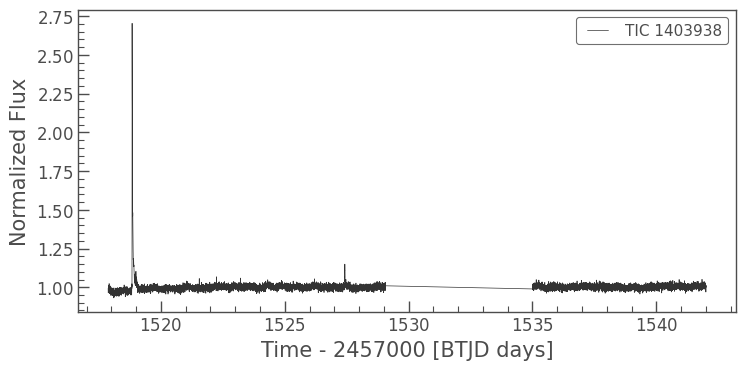

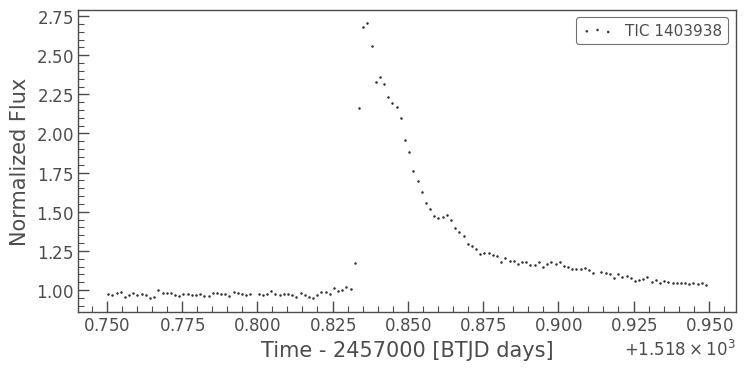

In [3]:
#search flare
#search_result = lk.search_lightcurve('TIC 1403938')
#search_result[0]

#plot flare
#lc = search_result[0].download()
#lc.plot()

#remove nan values
lc1 = lc.remove_nans()
lc1.plot()

#normalize
lc2 = lc1.normalize()
lc2.plot()       #actual flare normalized plot

#saving the plot by creating folder
folder = "lightkurve_plots"
if not os.path.exists(folder):
    os.makedirs(folder)
#plt.savefig("./lightkurve_plots/flare_1403938")

#to create fit file
#lc.to_fits(path='./TIC_233547261/TIC_233547261.fits', overwrite=True)

#to truncate values
#lc3 = lc2.truncate(before = [1518.75], after = [1518.95])
#lc3.scatter()
#plt.savefig("./lightkurve_plots/flare_1403938_zoomed")
#lc3.to_csv(path_or_buf = './allesfit/TIC_1403938_new.csv',overwrite=True)

# 2) Running nested sampling

In [4]:
#one flare

allesfitter.show_initial_guess('allesfit')
allesfitter.ns_fit('allesfit')
allesfitter.ns_output('allesfit')


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
             ('tim

100%|██████████| 5/5 [00:00<00:00, 276.17it/s]


Plotting individual transits for companion b and instrument TIC_1403938...
Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632



Running on 7 CPUs.


17207it [02:33, 111.76it/s, batch: 6 | bound: 19 | nc: 24 | ncall: 377733 | eff(%):  4.555 | loglstar: 147.953 < 153.549 < 151.972 | logz: 139.660 +/-  0.101 | stop:  0.931]          



Time taken to run 'dynesty' (in dynamic mode) is 0.04 hours



! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
             ('tim

100%|██████████| 5/5 [00:00<00:00, 26.61it/s]


Plotting individual transits for companion b and instrument TIC_1403938...

Results:
----------
log(Z) = 139.63725421771375 +- 0.09499527446227651
Nr. of posterior samples: 17207
Deriving eclipse depths (and more) from the model curves for companion b and instrument TIC_1403938...

No values available to be derived.

Performing diagnostic tests on the fit's residuals...

Anderson-Darling Test
---------------------
This tests the null hypothesis that the residuals follows a normal distribution.
Test statistic		 19.253735090342815
Critical values		 [0.561 0.639 0.766 0.894 1.063]
Significance levels	 [0.15  0.1   0.05  0.025 0.01 ]
Does the null hypotheses hold at a significance level of...
... 0.15 		 False
... 0.1 		 False
... 0.05 		 False
... 0.025 		 False
... 0.01 		 False
The null hypothesis is rejected at some significance levels.
In simple words: there might still be some structure in your residuals.


Augmented Dickey-Fuller Test
----------------------------
This tests the null

'"What... is the air-speed velocity of an unladen swallow?" - Bridgekeeper, Monty Python and the Holy Grail\n'

# 3) Run residuals 

In [5]:
#     ::: your settings
datadir = 'allesfit' #change this to what you need
inst = 'TIC_1403938' #change this to what you need
key = 'flux' #change this to what you need


#     ::: initialize the allesclass
alles = allesfitter.allesclass(datadir);


#     ::: load the data (and the correct error bars)
time = alles.data[inst]['time']
flux = alles.data[inst][key]
flux_err = alles.data[inst]['err_scales_'+key] * alles.posterior_params_median['err_'+key+'_'+inst]


#     ::: load the median baseline, median lightcurve model, and median residuals
baseline = alles.get_posterior_median_baseline(inst, key)
model = alles.get_posterior_median_model(inst, key)
residuals = alles.get_posterior_median_residuals(inst, key)


#     ::: save everything to a file for your collaborators
X = np.column_stack((time, flux, flux_err,model, residuals)) #detrended_flux, model, residuals))
np.savetxt('residual_TIC_1403938.csv', X, delimiter=',')

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
             ('time_format', 'BJD_TDB'),
             ('inst_rv2', []


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632

! WARNING:
 No NS nor MCMC derived file detected.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/__init__.py, line: 140


# 4) Opening residual file

In [29]:
colnames = ("time" , "flux" , "flux_err" , "model" ,"residuals")
file = ascii.read("residual_TIC_1403938.csv", Reader=ascii.NoHeader, names=colnames)
#print(file['flux'][0])

In [28]:
# max point position of the flare

maximum = np.max(file["flux"])
print(maximum) # to be put in csv

2.7039878


In [22]:
#for finding the index of maximum position of flare

result = np.where(arr == maximum)
print(result)

(array([61]),)


In [46]:
#for finding the x value for the maximum point of flare

max_x = file["time"][61]
print(max_x)

1518.8365833127125


In [61]:
# establishing start-end values for the flare

flare_start = max_x - 0.01
flare_end = max_x + 0.04 

print(flare_start)
print(flare_end)

1518.8265833127125
1518.8765833127125


In [78]:
#for getting half maxima position

half_max = (maximum-1)/2
print(half_max)
print(half_max+1) #position to be put in csv for amplitude
amp = half_max+1

0.8519939000000001
1.8519939


# 5) Plots (data, residuals, residuals zoom, and Lomb Scargle periodogram all in one plot)

Old version

In [42]:
time = file["time"]

In [44]:
from astropy import units as u
time_in_days = (1/100)*u.day
time_in_days.to(u.min)
time_2_days = time*u.day
time_2_min = time_2_days.to(u.min).value

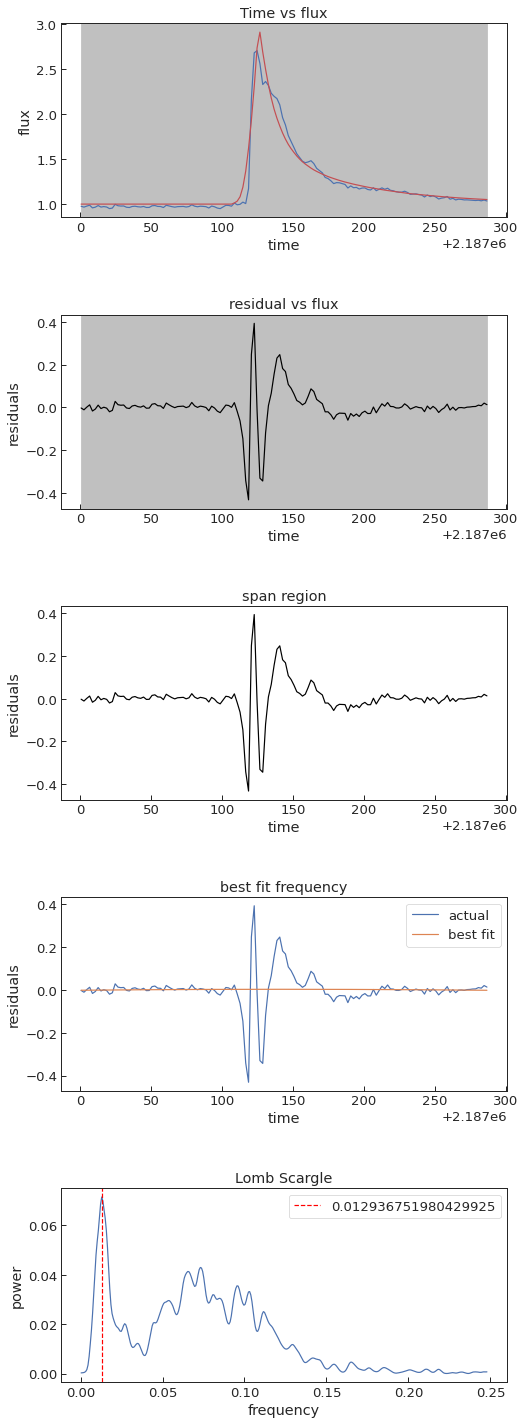

In [57]:
flux = file["flux"]
residuals = file ["residuals"]

#for the whole part
t_start = time_2_min[0]
t_end = time_2_min[-1]

#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (8,25))

#1) time vs flux
ax1.title.set_text("Time vs flux")
ax1.plot(time_2_min, flux, 'b-')
ax1.plot(time_2_min,model, "r")
ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("time")
ax1.set_ylabel("flux")

#2) plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time_2_min >= t_start) & (time_2_min <= t_end))
ax2.title.set_text("residual vs flux")
ax2.plot(time_2_min, residuals, 'black')
ax2.set_xlabel("time")
ax2.set_ylabel("residuals")

#3) plot of span region
time_2 = time_2_min[ind]
residuals_2 = residuals[ind]

ax3.title.set_text("span region")
ax3.plot(time_2,residuals_2, 'black')
ax3.set_xlabel("time")
ax3.set_ylabel("residuals")

#4) Best frequency
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=0.1,maximum_frequency=150)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2
ls = LombScargle(time_2, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()


#5) lomb scargle applied
frequency, power = LombScargle(time_2, residuals_2).autopower(nyquist_factor = 1)#(maximum_frequency=100)
ax5.plot(frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle")
ax5.set_xlabel("frequency")
ax5.set_ylabel("power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_freq = frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_freq, color = "red", linestyle = "--", label = max_freq)
plt.legend()

plt.subplots_adjust(hspace=0.5)


for the whole region

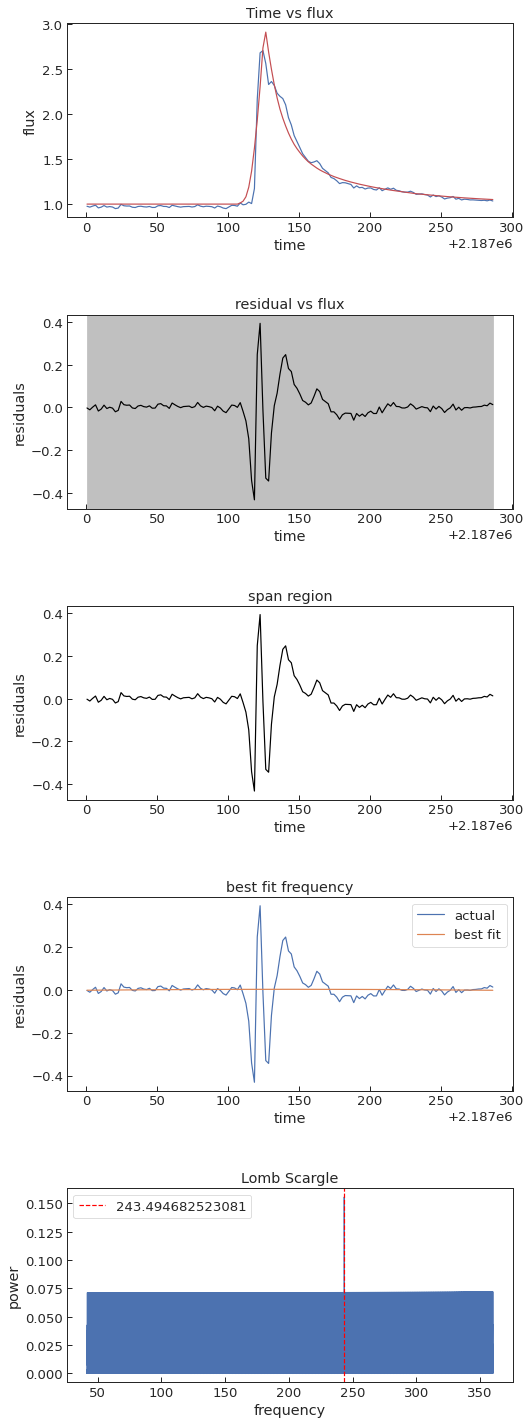

In [53]:
time = file["time"]

#time conversion to minutes
from astropy import units as u
time_in_days = (1/100)*u.day
time_in_days.to(u.min)
time_2_days = time*u.day
time_2_min = time_2_days.to(u.min).value

flux = file["flux"]
residuals = file ["residuals"]

#fot thr flare part
#t_start = 1518.8310276235154
#t_end = 1518.849083613405355


#for the whole part
t_start = time_2_min[0]
t_end = time_2_min[-1]

#t_start = flare_start
#t_end = flare_end


#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (8,25))

#time vs flux
ax1.title.set_text("Time vs flux")
ax1.plot(time_2_min, flux, 'b-')
ax1.plot(time_2_min,model, "r")
#ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("time")
ax1.set_ylabel("flux")

#plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time_2_min >= t_start) & (time_2_min <= t_end))
ax2.title.set_text("residual vs flux")
ax2.plot(time_2_min, residuals, 'black')
ax2.set_xlabel("time")
ax2.set_ylabel("residuals")

#plot of span region
time_2 = time_2_min[ind]
residuals_2 = residuals[ind]

ax3.title.set_text("span region")
ax3.plot(time_2,residuals_2, 'black')
ax3.set_xlabel("time")
ax3.set_ylabel("residuals")

#Best frequency
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=0.1,maximum_frequency=100)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2
ls = LombScargle(time_2, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()

#lomb scargle applied
min_period = 4/60/24. #in days; 4 min converted into days; determined by Nyquist frequency because of TESS 2 min cadence
max_period = 2 * 0.012 #in days; twice the FWHM of the flare to automatise it (edited) 
#And then you just convert it and feed it into autopower
minimum_frequency=1./max_period
maximum_frequency=1./min_period
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=minimum_frequency, maximum_frequency=maximum_frequency)
#frequency, power = LombScargle(time_2, residuals_2).autopower(nyquist_factor = 1)#(maximum_frequency=100)
ax5.plot(frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle")
ax5.set_xlabel("frequency")
ax5.set_ylabel("power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_freq = frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_freq, color = "red", linestyle = "--", label = max_freq)
plt.legend()

plt.subplots_adjust(hspace=0.5)


For the flare region

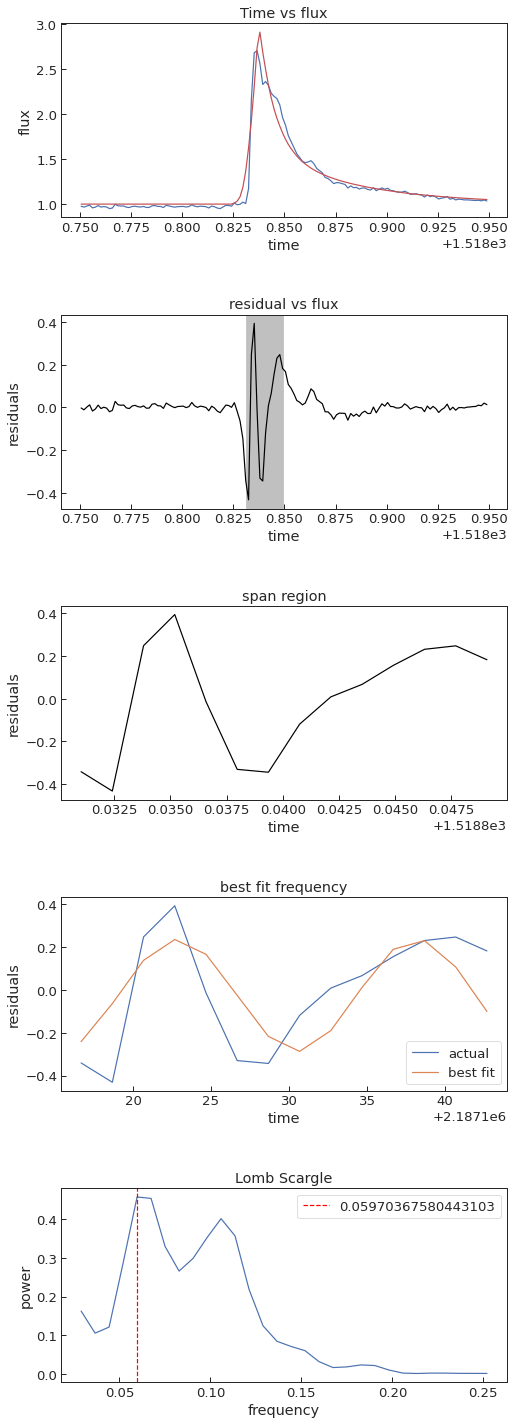

In [61]:
time = file["time"]
flux = file["flux"]
residuals = file ["residuals"]

#fot thr flare part
t_start = 1518.8310276235154
t_end = 1518.849083613405355

#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (8,25))

#1) time vs flux
ax1.title.set_text("Time vs flux")
ax1.plot(time, flux, 'b-')
ax1.plot(time,model, "r")
#ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("time")
ax1.set_ylabel("flux")

#2) plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time >= t_start) & (time <= t_end))
ax2.title.set_text("residual vs flux")
ax2.plot(time, residuals, 'black')
ax2.set_xlabel("time")
ax2.set_ylabel("residuals")

#3) plot of span region
time_2 = time[ind]
residuals_2 = residuals[ind]
ax3.title.set_text("span region")
ax3.plot(time_2,residuals_2, 'black')
ax3.set_xlabel("time")
ax3.set_ylabel("residuals")


#time conversion to minutes
from astropy import units as u
time_in_days = (1/100)*u.day
time_in_days.to(u.min)
time_2_days = time_2*u.day
time_2_min = time_2_days.to(u.min).value


#4) Best frequency
frequency, power = LombScargle(time_2_min, residuals_2).autopower(nyquist_factor = 1)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2_min
ls = LombScargle(time_2_min, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2_min,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()

#5) lomb scargle applied
min_period = 4  #(/60/24.), for having in minutes, so not taken #in days; 4 min converted into days; determined by Nyquist frequency because of TESS 2 min cadence
max_period = 2 * 0.012 *1440 #in days; twice the FWHM of the flare to automatise it (edited) 
#And then you just convert it and feed it into autopower
minimum_frequency=1./max_period
maximum_frequency=1./min_period
frequency, power = LombScargle(time_2_min, residuals_2).autopower(minimum_frequency=minimum_frequency, maximum_frequency=maximum_frequency)
#frequency, power = LombScargle(time_2, residuals_2).autopower(nyquist_factor = 1)#(maximum_frequency=100)
ax5.plot(frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle")
ax5.set_xlabel("frequency")
ax5.set_ylabel("power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_freq = frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_freq, color = "red", linestyle = "--", label = max_freq)
plt.legend()

plt.subplots_adjust(hspace=0.5)